## 1. Data Splitting


Data Split Statistics:
Total samples: 973556
Training samples: 681489 (70.0%)
Test samples: 292067 (30.0%)

Class distribution in full dataset:
Part 1-2
1    0.595686
2    0.404314
Name: proportion, dtype: float64

Class distribution in training set:
Part 1-2
1    0.595687
2    0.404313
Name: proportion, dtype: float64

Class distribution in test set:
Part 1-2
1    0.595685
2    0.404315
Name: proportion, dtype: float64


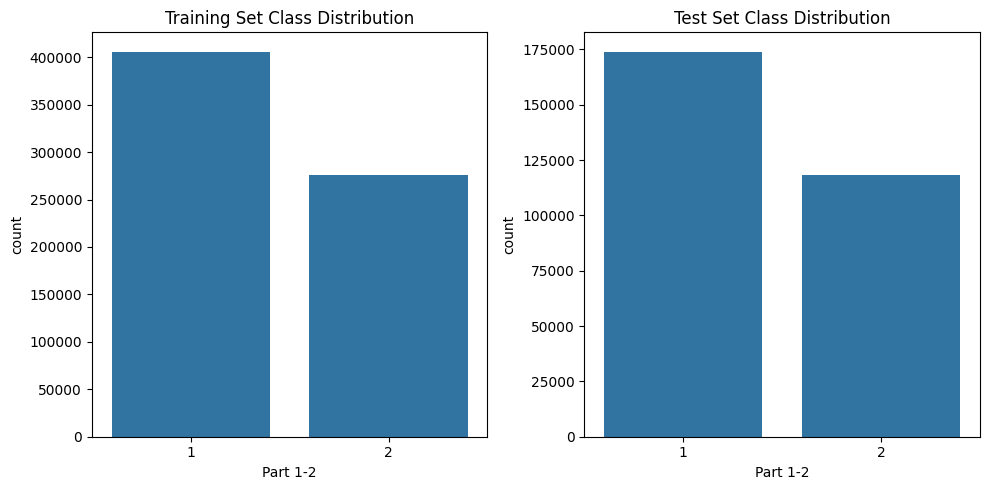

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import gzip



# 1. Load and prepare the data
def prepare_data(df):
    # Select features for modeling
    # Remove date columns and other non-predictive columns
    feature_cols = df.select_dtypes(include=['int64', 'float64', 'bool']).columns.tolist()
    feature_cols = [col for col in feature_cols if col != 'Part 1-2']  # Remove target variable
    
    # Prepare X (features) and y (target)
    X = df[feature_cols]
    y = df['Part 1-2']
    
    return X, y

# 2. Split data and show statistics
def split_and_show_stats(X, y, test_size=0.3, random_state=42):
    # Perform stratified split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, 
        test_size=test_size, 
        random_state=random_state,
        stratify=y
    )
    
    # Calculate and display statistics
    print("\nData Split Statistics:")
    print(f"Total samples: {len(X)}")
    print(f"Training samples: {len(X_train)} ({len(X_train)/len(X)*100:.1f}%)")
    print(f"Test samples: {len(X_test)} ({len(X_test)/len(X)*100:.1f}%)")
    
    print("\nClass distribution in full dataset:")
    print(y.value_counts(normalize=True))
    
    print("\nClass distribution in training set:")
    print(y_train.value_counts(normalize=True))
    
    print("\nClass distribution in test set:")
    print(y_test.value_counts(normalize=True))
    
    return X_train, X_test, y_train, y_test

# 3. Create cross-validation splits
def create_cv_splits(X_train, y_train, n_splits=5):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    return skf

# 4. Preprocess features
def preprocess_features(X_train, X_test):
    # Create scaler
    scaler = StandardScaler()
    
    # Fit and transform training data
    X_train_scaled = scaler.fit_transform(X_train)
    
    # Transform test data
    X_test_scaled = scaler.transform(X_test)
    
    return X_train_scaled, X_test_scaled, scaler

# Main execution
def main():
    # Load the cleaned dataset
    file_path = 'cleaned_crime_data.csv.gz'
    with gzip.open(file_path, 'rt') as f:
        df = pd.read_csv(f)

    # 1. Prepare the data
    X, y = prepare_data(df)

    # 2. Split the data and show statistics
    X_train, X_test, y_train, y_test = split_and_show_stats(X, y)

    # 3. Create cross-validation splits
    cv = create_cv_splits(X_train, y_train)

    # 4. Preprocess features
    X_train_scaled, X_test_scaled, scaler = preprocess_features(X_train, X_test)
    
    # Visual confirmation of the split
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    sns.countplot(x=y_train)
    plt.title('Training Set Class Distribution')
    
    plt.subplot(1, 2, 2)
    sns.countplot(x=y_test)
    plt.title('Test Set Class Distribution')
    
    plt.tight_layout()
    plt.show()
    
    # Return processed datasets for modeling
    return X_train_scaled, X_test_scaled, y_train, y_test, cv

if __name__ == "__main__":
    X_train_scaled, X_test_scaled, y_train, y_test, cv = main()

## 2. Experiment with k-NN Classification Model




## 3. Experiment with Naïve Bayes Classification Model



## 4. Experiment with Logistic Regression Classification Model



## 5. Experiment with SVM Classification Model



## 6. Experiment with Decision Tree (DT) Classification Model



## 7. Experiment with Back Propagation Neural Network (BPNN) Classification Model